In [1]:
import pandas as pd
import xgboost as xbg
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
def plot_results(y_test, y_pred, model ):
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    y_pred_onehot = pd.get_dummies(y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_onehot, multi_class='ovo')
    print('Model performance for {model}'.format(model=model))
    print('------------------------------------------------')
    print('Accuracy is ', acc)
    print('F1 is ', f1)
    print('ROC AUC Score is ', roc_auc)
    print('------------------------------------------------')

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    df = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    df2 = df.div(df.sum(axis=1), axis=0)
    ax = sns.heatmap(df2)
    ax.set(xlabel='Predicted', ylabel='Actual', title=f'Confusion Matrix for {model}')
    plt.show()
  

In [4]:
y_true = pd.read_csv('../../Files/models/y_true.csv')

In [5]:

y_true.reset_index(drop=True, inplace=True)
y_true = y_true.to_numpy()
y_true = y_true.flatten()

## Explainable Models

### Linear Regression

In [92]:
y_pred = np.loadtxt('../../Files/models/lr_pred.csv', delimiter=',')

Model performance for Logistic Regression
------------------------------------------------
Accuracy is  0.4772888956416661
F1 is  0.2892851572138753
ROC AUC Score is  0.5812123965475927
------------------------------------------------


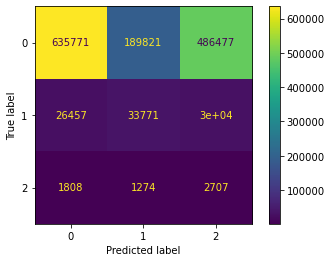

In [100]:
plot_results(y_true, y_pred, 'Logistic Regression')

### XGBoost

In [102]:
y_pred = np.fromfile('../../Files/models/xgb_test.txt', sep=' ')

In [104]:
y_pred.shape

(1408474,)

Model performance for XGBoost
------------------------------------------------
Accuracy is  0.8608841909754813
F1 is  0.53970939527811
ROC AUC Score is  0.8576378919397051
------------------------------------------------


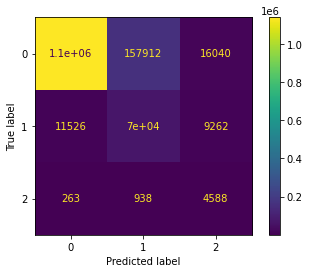

In [105]:
plot_results(y_true, y_pred, 'XGBoost')

## Neural Networks

### CNN

In [112]:
y_pred = np.loadtxt('../../Files/models/cnn_results.txt')

In [115]:
y_pred[0:10]

array([9.99912977e-01, 7.27573497e-05, 1.42607951e-05, 9.78811800e-01,
       1.94173157e-02, 1.77089276e-03, 9.99758661e-01, 1.86581878e-04,
       5.46742085e-05, 1.55724501e-06])

In [116]:
y_pred = y_pred.reshape(1408474, 3)

In [119]:
y_pred = y_pred.round()

In [121]:
y_pred = np.argmax(y_pred, axis=1)

array([0, 0, 0, 2, 0, 0, 0, 1, 0, 0])

Model performance for CNN
------------------------------------------------
Accuracy is  0.8999498748290703
F1 is  0.5749161834943711
ROC AUC Score is  0.8847233525388848
------------------------------------------------


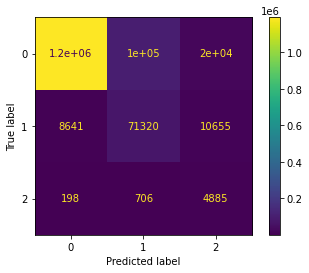

In [123]:
plot_results(y_true, y_pred, 'CNN')

In [37]:
y_pred = np.loadtxt('../../Files/models/cnn_results2.txt')

Model performance for CNN
------------------------------------------------
Accuracy is  0.8892517717756948
F1 is  0.5507019956386668
ROC AUC Score is  0.8728806283654875
------------------------------------------------


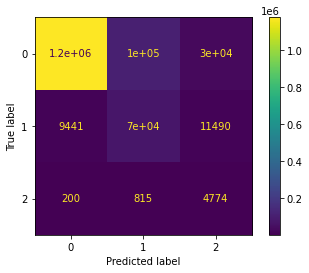

In [38]:
y_pred = y_pred.reshape(1408474, 3)
y_pred = y_pred.round()
y_pred = np.argmax(y_pred, axis=1)
plot_results(y_true, y_pred, 'CNN')

### Pre-trained BERT

In [2]:
df = pd.read_pickle('../../Files/models/bert_base_cased_model/fully_trained/bert_base_cased_predictions.pickle')

In [12]:
y_pred = []

In [14]:
for i, j in df.iterrows():
    y_pred.append(df[0][i]['label'][-1])

In [21]:
y_pred = np.array(y_pred)

In [26]:
y_pred = [int(x) for x in y_pred]

In [27]:
type(y_pred[0])

int

Model performance for BERT
------------------------------------------------
Accuracy is  0.9042864831015694
F1 is  0.593250898842808
ROC AUC Score is  0.9015098483658733
------------------------------------------------


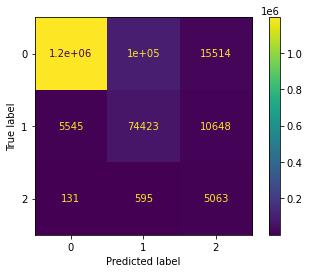

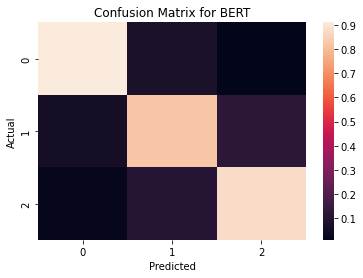

In [60]:
plot_results(y_true, y_pred, 'BERT')

In [10]:
df[0][2]['label'][-1]

'0'

In [25]:
df = pd.read_pickle('../../Files/models/bert_base_cased_model/fully_trained/bert_base_cased_predictions2.pickle')

In [26]:
df.head()

,0
0,"{'label': 'LABEL_0', 'score': 0.9984500408172607}"
1,"{'label': 'LABEL_0', 'score': 0.9241588115692139}"
2,"{'label': 'LABEL_0', 'score': 0.9884061813354492}"
3,"{'label': 'LABEL_2', 'score': 0.718645453453064}"
4,"{'label': 'LABEL_0', 'score': 0.9409974217414856}"


In [37]:
label = []
confidence = []
for i, j in df.iterrows():
    label.append(df[0][i]['label'][-1])
    confidence.append(df[0][i]['score'])

# y_pred = np.array(y_pred)
label = [int(x) for x in label]

In [38]:
df3 = pd.DataFrame({'prediction': label, 'confidence': confidence, 'actual': y_true})

In [39]:
df3['correct'] = df3['prediction'] == df3['actual']

<AxesSubplot:>

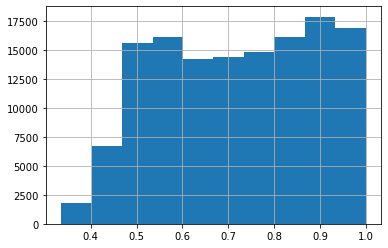

In [50]:
df3[df3['correct']== False].confidence.hist()

In [51]:
df4 = df3[df3['correct']== False]

In [52]:
len(df4)

134810

In [53]:
df4.groupby('prediction').count()

,confidence,actual,correct
prediction,,,
0,5676,5676,5676
1,102972,102972,102972
2,26162,26162,26162


In [54]:
df5 = df4[df4['prediction'] == 1]

In [55]:
df5.groupby('actual').count()

,prediction,confidence,correct
actual,,,
0,102377,102377,102377
2,595,595,595


<AxesSubplot:>

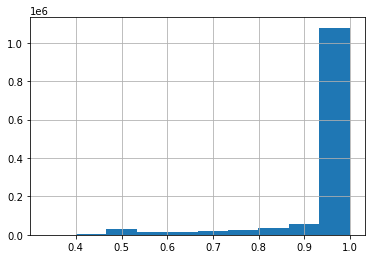

In [48]:
df3[df3['correct']== True].confidence.hist()

Model performance for BERT
------------------------------------------------
Accuracy is  0.9042864831015694
F1 is  0.593250898842808
ROC AUC Score is  0.9015098483658733
------------------------------------------------


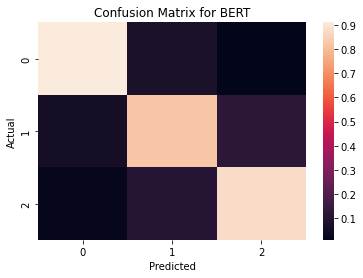

In [23]:
plot_results(y_true, y_pred, 'BERT')

### Kullback Leibler Divergence to improve BERT